In [69]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
colors = sns.color_palette()

In [70]:
from halotools.empirical_models import HodModelFactory
from halotools.empirical_models import TrivialPhaseSpace, Zheng07Cens
from halotools.empirical_models import NFWPhaseSpace, Zheng07Sats
from halotools.sim_manager import CachedHaloCatalog
from src.redMagicHOD import RedMagicCens, RedMagicSats, StepFuncCens, StepFuncSats

In [71]:
rz = 0.0
cens_prof_model = TrivialPhaseSpace(redshift = rz)
sats_prof_model = NFWPhaseSpace(redshift = rz)
model_instance = HodModelFactory(
        #centrals_occupation = StepFuncCens(redshift = rz),
        centrals_occupation = RedMagicCens(redshift = rz),
        centrals_profile = cens_prof_model,
        #satellites_occupation = StepFuncSats(redshift = rz),
        satellites_occupation = RedMagicSats(redshift = rz),
        satellites_profile = sats_prof_model)

{'sigma_logM': 0.26, 'logMmin': 12.02}
{'sigma_logM': 0.46, 'logMmin': 12.1, 'f_c': 0.19}
{'sigma_logM': 0.46, 'logMmin': 12.1, 'f_c': 0.19}
set([])
{'logMmin': 12.02, 'logM0': 12.2, 'logM1': 13.7, 'sigma_logM': 0.26, 'alpha': 1.02}
set(['sigma_logM', 'logMmin'])
{}
set([])
{}
set([])


In [72]:
print model_instance.param_dict

{'logMmin': 12.02, 'f_c': 0.19, 'logM0': 12.2, 'sigma_logM': 0.26, 'logM1': 13.7, 'alpha': 1.02}


In [73]:
model_instance.param_dict['logMmin'] = 12
model_instance.param_dict['sigma_logM'] = 0.46

In [74]:
simname = 'chinchilla1050'
rz = 0.0
version_name = 'most_recent'
#version_name = 'Lb400-2048'
size = (1050.0)**3
halocat= CachedHaloCatalog(simname = simname, halo_finder = 'rockstar',version_name = version_name, redshift = rz)

In [75]:
model_instance.populate_mock(halocat, Num_ptcl_requirement = 0)

In [76]:
print len(halocat._halo_table), len(halocat._halo_table[halocat._halo_table['halo_upid']!=-1])

9614661 1017130


In [77]:
from halotools.mock_observables import return_xyz_formatted_array
from halotools.utils import group_member_generator

halos = model_instance.mock.halo_table

#halos = halos[halos['halo_mvir']> 7e12]

halos.sort(['halo_id', 'halo_upid'])
grouping_key = 'halo_id'
requested_columns = ['halo_num_centrals', 'halo_num_satellites', 'halo_mvir']
group_gen = group_member_generator(halos, grouping_key, requested_columns)

ncen = []
nsat = []
mass = []

for first, last, member_props in group_gen:

    ncen.append(member_props[0][0])
    nsat.append(member_props[1][0])
    mass.append(member_props[2][0]) 
    
ncen = np.array(ncen)
nsat = np.array(nsat)
mass = np.array(mass)

In [78]:
nTot = np.sum(ncen+nsat)
nDens = nTot/size
print 'Galaxy Number Density: %e'%nDens

Galaxy Number Density: 1.183324e-03


In [79]:
print len(halos), len(halos[halos['halo_upid']!=-1])

8597531 0


In [80]:
print ncen

[0 0 0 ..., 0 0 0]


In [81]:
from halotools.mock_observables import mean_y_vs_x
xmin, xmax = 1e11, 1e16
ymin, ymax = 0, 70
halo_mass = np.logspace(np.log10(xmin),np.log10(xmax),100) #bad name, actually mass bins. 

binned_logmass, ncen_hat, ncen_err= mean_y_vs_x(mass, ncen, bins = halo_mass, error_estimator = 'variance')
binned_logmass, nsat_hat, nsat_err= mean_y_vs_x(mass, nsat, bins = halo_mass, error_estimator = 'variance')

nhalo_binned, be = np.histogram(mass, halo_mass)

In [82]:
mean_ncen = model_instance.mean_occupation_centrals(prim_haloprop = halo_mass)
mean_nsat = model_instance.mean_occupation_satellites(prim_haloprop = halo_mass)

In [83]:
print mean_ncen

[ 0.0002004   0.00033349  0.0005427   0.00086377  0.00134478  0.00204827
  0.00305267  0.00445262  0.00635749  0.00888778  0.01216892  0.01632258
  0.02145576  0.02764863  0.03494235  0.04332838  0.05274107  0.06305495
  0.07408762  0.08560861  0.09735351  0.10904203  0.12039789  0.13116827
  0.14114051  0.15015424  0.15810791  0.16495933  0.17072094  0.1754509
  0.17924163  0.18220739  0.18447257  0.18616153  0.1873909   0.18826448
  0.18887047  0.18928085  0.18955215  0.18972725  0.18983756  0.18990541
  0.18994616  0.18997004  0.1899837   0.18999133  0.1899955   0.18999771
  0.18999887  0.18999945  0.18999974  0.18999988  0.18999995  0.18999998
  0.18999999  0.19        0.19        0.19        0.19        0.19        0.19
  0.19        0.19        0.19        0.19        0.19        0.19        0.19
  0.19        0.19        0.19        0.19        0.19        0.19        0.19
  0.19        0.19        0.19        0.19        0.19        0.19        0.19
  0.19        0.19        0.

In [84]:
print sum(ncen/size - np.ones(mass.shape)/size), sum(nsat/size), 

-0.0066447718396 0.000401225785551


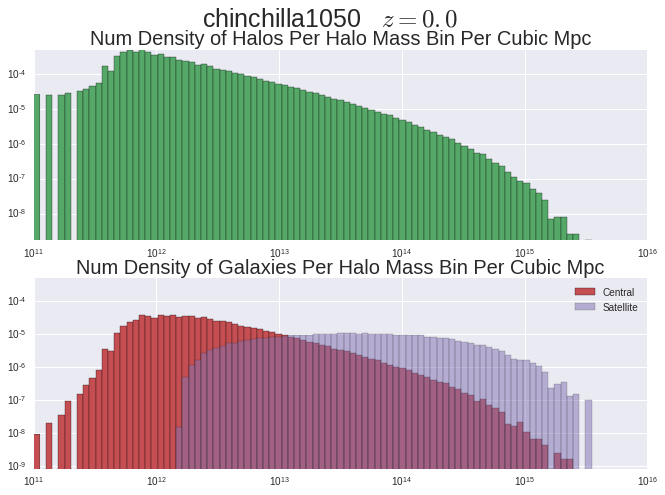

In [85]:
fig = plt.figure(figsize = (11,7.5))

plt.subplot(211)
plt.title("Num Density of Halos Per Halo Mass Bin Per Cubic Mpc",fontsize = 20)

plt.hist(mass, halo_mass, weights = np.ones(mass.shape)/size, color = colors[1])
plt.xscale('log')
plt.yscale('log')

#plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))

plt.xlim([xmin,xmax])
plt.ylim([0, 5e-4])

plt.subplot(212)
plt.title("Num Density of Galaxies Per Halo Mass Bin Per Cubic Mpc",fontsize = 20)
plt.hist(mass, halo_mass,weights = ncen/size, color = colors[2], label = 'Central')
plt.hist(mass, halo_mass,weights = nsat/size, color = colors[3], alpha = 0.5, label = 'Satellite')
plt.legend(loc = 'best')

plt.xscale('log')
plt.yscale('log')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlim([xmin,xmax])
plt.ylim([0, 5e-4])

plt.suptitle('%s\t $z = %.1f$'%(simname, rz), fontsize = 25)

plt.show()

In [86]:
'%e'%halocat.particle_mass

'3.348810e+10'

In [87]:
print mean_ncen.shape

(100,)


In [88]:
x, be = np.histogram(mass, halo_mass, weights = np.ones(ncen.shape))
y = x*mean_ncen[:-1]

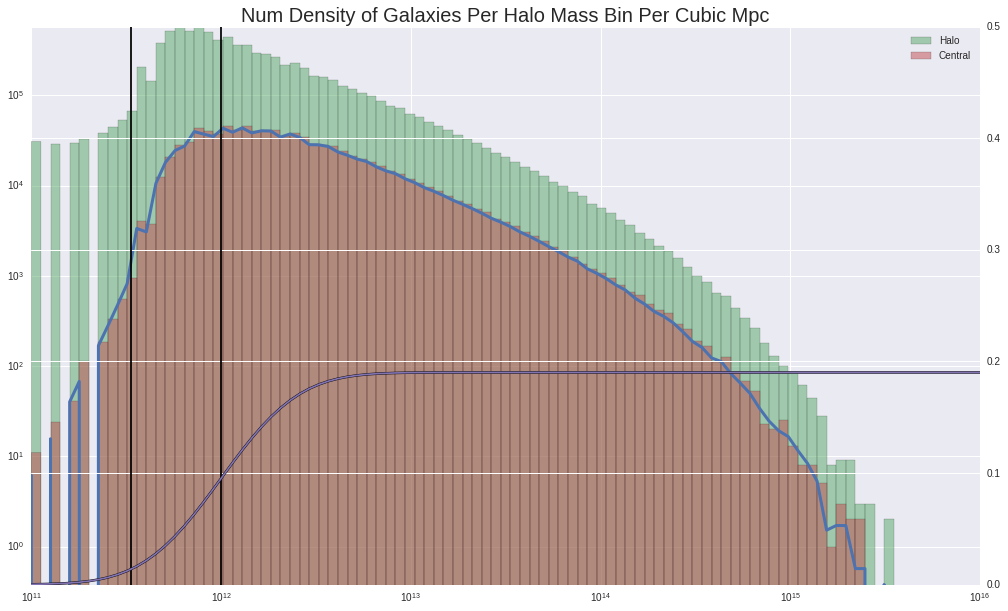

In [89]:
fig, ax1 = plt.subplots(figsize = (17,10))
plt.title("Num Density of Galaxies Per Halo Mass Bin Per Cubic Mpc",fontsize = 20)
ax1.hist(mass, halo_mass,weights = np.ones(ncen.shape), color = colors[1], alpha = 0.5,label = 'Halo')
ax1.hist(mass, halo_mass,weights = ncen, color = colors[2], alpha = 0.5, label = 'Central')
#ax1.hist(mass, halo_mass,weights = nsat/size, color = colors[3], alpha = 0.5, label = 'Satellite')
plt.plot(halo_mass[:-1], y, lw = 3)
ax1.legend(loc = 'best')

ax1.set_xscale('log')
ax1.set_yscale('log')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1.set_ylim([0, size*5e-4])
#plt.suptitle('%s\t $z = %.1f$'%(simname, rz), fontsize = 25

ax2 = ax1.twinx()
#ax2.plot(binned_logmass, ncen_hat, color = 'k', lw = 2.5)

#ax2.plot(binned_logmass, ncen_hat, color = colors[2])

ax2.plot(halo_mass, mean_ncen, color = 'k', lw = 2.5)

ax2.plot(halo_mass, mean_ncen, color = colors[3])

#ax2.plot(halo_mass, mean_ncen, color = colors[2], ls = '--')
#ax2.plot(binned_logmass, nsat_hat, color = colors[3])
#ax2.plot(halo_mass, mean_nsat, color = colors[3], ls = '--')
ax2.vlines(10**12.0,0, 0.5)
ax2.vlines(halocat.particle_mass*10,0, 0.5)

ax2.set_xscale('log')

plt.show()